# Introduction

In this capstone we are going to solve the problem of finding the severity of the accident based on the weather condition or lighting some other conditions which can lead to accident. In this capstone we will also try to predict the probability of the accident which can be avoided people travelling on the road.

Background of this project is to find the causes of the accident and if we can figure out way to predict an accident and thereby saving precious lives. This predection will help not only the commutors to be alert while driving, it can be used by traffic management officials to flash important messages using billboards. 



# Data Description

In this capstone we are going to use the data which is available in this site which contains the various attributes of each accident. there are 37 attributes for each accident. In this the most important one is the security code which is what we have to predict Based on other attributes . Some of the attributes which we Can use our location of the accident, lighting conditions, road conditions, Weather conditions, speed of the vehicle etc 

We can create a model Which will predict of accident and also the probability and train the model using training data and then further test it with test data which will be a portion of the current data which we have. 

After having a quick look at the data we can see that most of the accidents are either of severity code 2 or 1. For severity code 2, hey which is an injury most of the accident are happening at the intersection so this is also be a key factor 2 predict an accident.

Also we can see that most of the accident at least 50% are happening when they weather condition is not clear. So as you we can have a insight in the current data and predict the severity of the accident  



# Data Analysis

In this section, we will try to understand dataset and look into each column and its values. After this process, we will come to know which columns will be useful for us to use in our model.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [204]:
accidentData = pd.read_csv('Data-Collisions.csv',low_memory=False,parse_dates=True)

In [205]:
accidentData.shape

(194673, 38)

### Let's load the dataframe values and see each column 

In [206]:
#pd.set_option('display.max_columns', None)
#accidentData.head(10)

accidentData.iloc[:,15:25].head(10)


,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC
0,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ..."
2,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END"
3,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
4,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
5,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
6,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
7,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...
8,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."
9,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ..."


In [207]:
accidentData.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [208]:
len(accidentData.INCKEY.unique())

194673

#### Above attribute is a unique identifier and normally unique identifier will be of no use for modeling
#### We will also skip Geo location attributes (X & Y) for time being

In [209]:
accidentData.STATUS.value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

#### Above attribute, does not give much insight after looking into the values. Also there is no info realted to this attribute in Metadata doc.

In [210]:
accidentData.ADDRTYPE.value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

<AxesSubplot:xlabel='ADDRTYPE'>

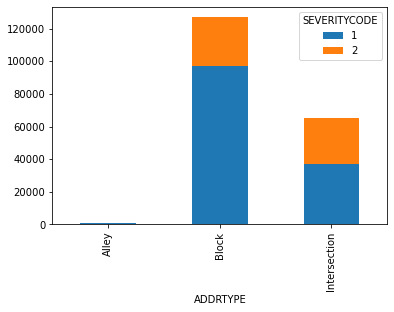

In [211]:
df = accidentData.groupby(['ADDRTYPE', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)


#### Above attribute gives very good insight and will be used for modeling. With most of the accident happening in Intersection & Block

In [212]:
accidentData.INTKEY.value_counts()

29973.0    252
29933.0    160
29913.0    138
29549.0    136
33512.0    128
          ... 
36825.0      1
26604.0      1
26603.0      1
36816.0      1
27793.0      1
Name: INTKEY, Length: 7614, dtype: int64

#### Above attribute, does not give much insight. For now we will keep this attribute on hold 

In [213]:
accidentData.EXCEPTRSNCODE.value_counts()

       79173
NEI     5638
Name: EXCEPTRSNCODE, dtype: int64

#### Above attribute, does not give much insight so we will not use in modeling 

In [214]:
accidentData.EXCEPTRSNDESC.value_counts()

Not Enough Information, or Insufficient Location Information    5638
Name: EXCEPTRSNDESC, dtype: int64

#### Above attribute, does not give much insight so we will not use in modeling

In [215]:
accidentData.SEVERITYDESC.value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

#### Above attribute, gives much insight on after effect of the collision so this will not help in predection. However it can support the need for accident  predection and avoid accidents.

In [216]:
accidentData.COLLISIONTYPE.value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

<AxesSubplot:xlabel='COLLISIONTYPE'>

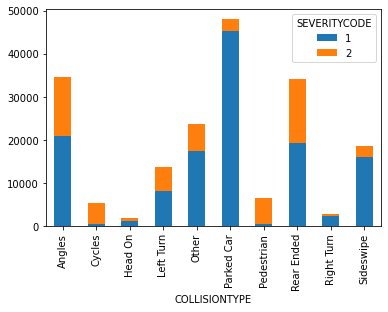

In [217]:
df = accidentData.groupby(['COLLISIONTYPE', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute, gives much insight and also give what could be the reason of accident 

In [218]:
accidentData.PERSONCOUNT.value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

<AxesSubplot:xlabel='PERSONCOUNT'>

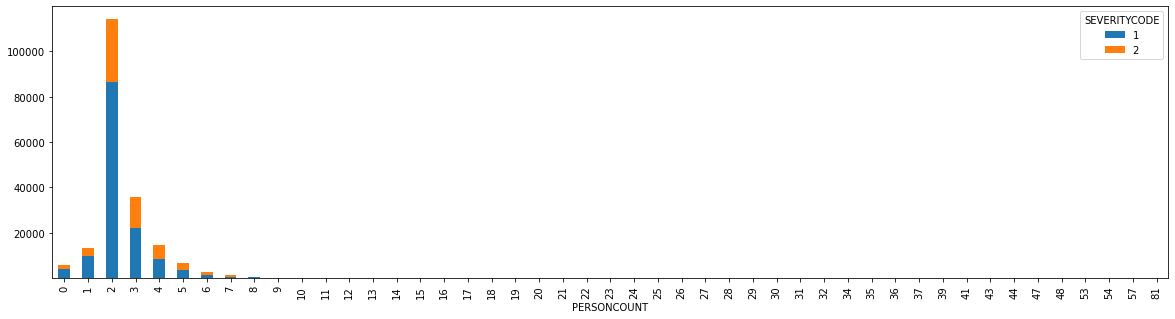

In [219]:
df = accidentData.groupby(['PERSONCOUNT', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True,figsize=(20,5))

#### Above attribute increases the severity of accident if more the number of people involved 

In [220]:
accidentData.PEDCOUNT.value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

<AxesSubplot:xlabel='PEDCOUNT'>

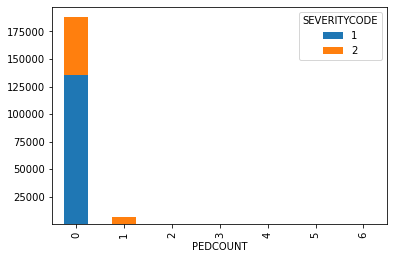

In [221]:
df = accidentData.groupby(['PEDCOUNT', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

In [222]:
accidentData['INCDATE_1'] = pd.to_datetime(accidentData['INCDATE']).dt.strftime('%B')
accidentData.INCDATE_1.value_counts()

October      17768
May          16763
November     16582
June         16566
January      16407
July         16364
August       16296
March        16150
April        15978
September    15864
December     15545
February     14390
Name: INCDATE_1, dtype: int64

#### Above attribute shows that accident is happening of similar count every month. 

In [223]:
accidentData.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

<AxesSubplot:xlabel='JUNCTIONTYPE'>

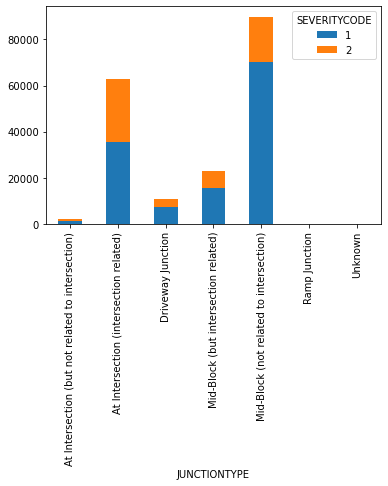

In [224]:
df = accidentData.groupby(['JUNCTIONTYPE', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute gives more insight into the location of accident

In [225]:
accidentData.SDOT_COLDESC.value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

<AxesSubplot:xlabel='SDOT_COLDESC'>

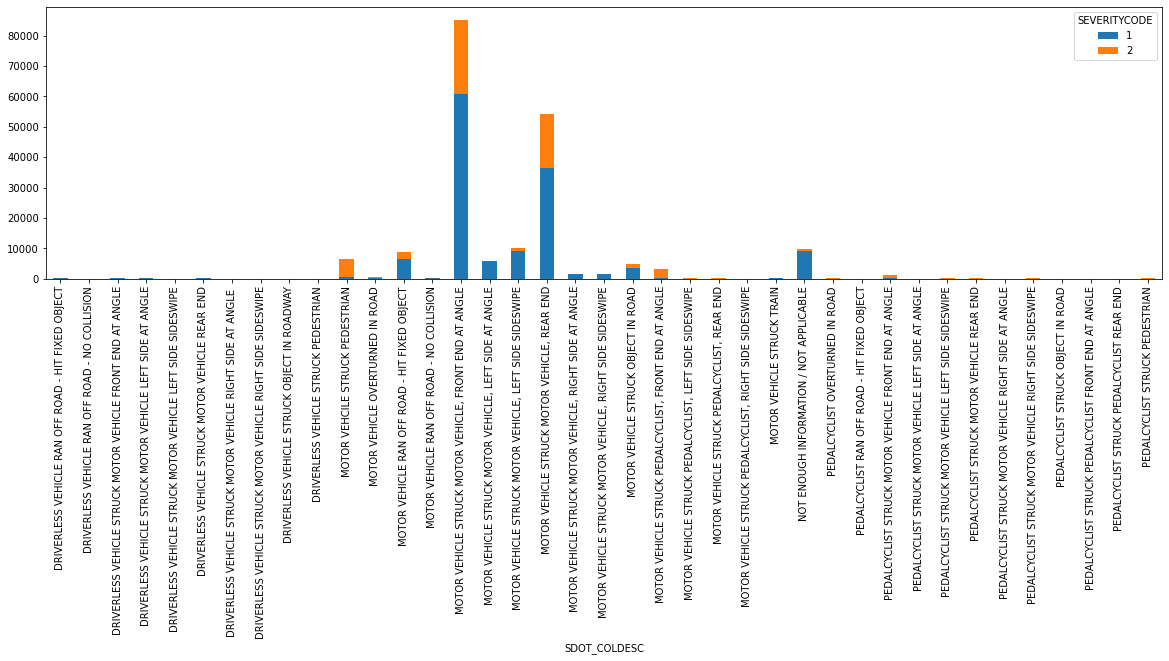

In [226]:
df = accidentData.groupby(['SDOT_COLDESC', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True,figsize=(20,5))

#### Above attribute, also give much insight on the root cause of the accident so we will use in modeling

In [227]:
accidentData.INATTENTIONIND.value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

#### Above attribute, does not give much insight. For now we will keep this attribute on hold 

In [228]:
accidentData.UNDERINFL.value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

<AxesSubplot:xlabel='UNDERINFL'>

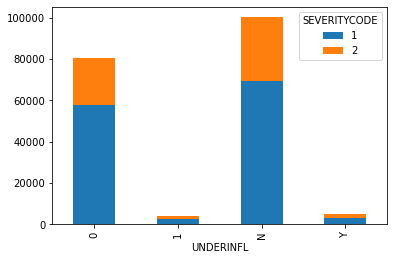

In [229]:
df = accidentData.groupby(['UNDERINFL', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute, can predeict the if we have prior knowledge of individual drinking behaviour. Also you can see that most number of accident is happening when the driver is not under alcohol influence so we attribute will not help much in modeling

In [230]:
accidentData.WEATHER.value_counts()


Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [231]:
(accidentData.WEATHER != 'Clear').sum()

83538

<AxesSubplot:xlabel='WEATHER'>

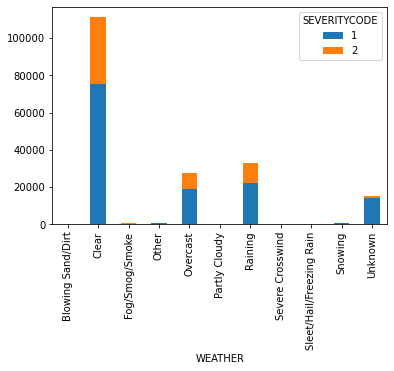

In [232]:
df = accidentData.groupby(['WEATHER', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute is one of the major factor for accidents and will be used in modeling. As you can see accidents are still more if the weather is clear. So this is a very good insight we got.

In [233]:
accidentData.ROADCOND.value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [234]:
(accidentData.ROADCOND != 'Dry').sum()

70163

<AxesSubplot:xlabel='ROADCOND'>

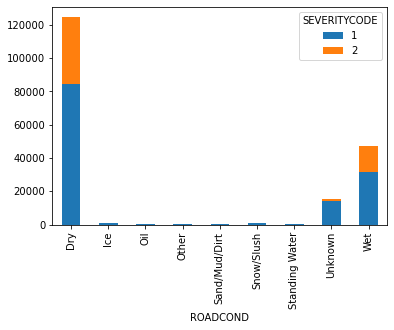

In [235]:
df = accidentData.groupby(['ROADCOND', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute is one of the major factor for accidents. However majority of accident is happening in dry condition only 

In [236]:
accidentData.LIGHTCOND.value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [237]:
(accidentData.LIGHTCOND != 'Daylight').sum()

78536

<AxesSubplot:xlabel='LIGHTCOND'>

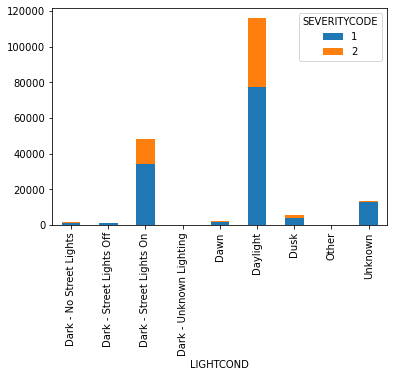

In [238]:
df = accidentData.groupby(['LIGHTCOND', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute is one of the major factor for accidents. However majority of accident is happening in Daylight only

In [239]:
accidentData.PEDROWNOTGRNT.value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

<AxesSubplot:xlabel='PEDROWNOTGRNT'>

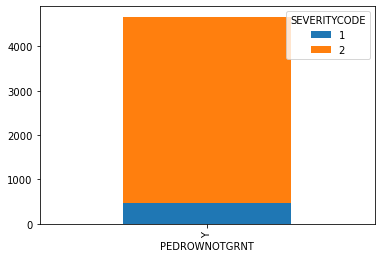

In [240]:
df = accidentData.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute, we need to check with if pedestrian was injured or not. If pedestrian right is not granted then accident will happen. However we are not getting much insight using this info. So we will keep this attribute on hold.

In [241]:
accidentData.SDOTCOLNUM.value_counts()

4116034.0     2
11200007.0    2
4112025.0     2
4116048.0     2
5036003.0     1
             ..
6262043.0     1
6162018.0     1
6277003.0     1
8267022.0     1
5071015.0     1
Name: SDOTCOLNUM, Length: 114932, dtype: int64

#### Above attribute does not give much insight

In [242]:
accidentData.SPEEDING.value_counts()

Y    9333
Name: SPEEDING, dtype: int64

<AxesSubplot:xlabel='SPEEDING'>

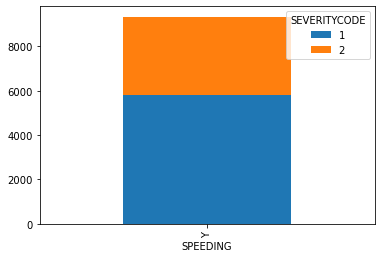

In [243]:
df = accidentData.groupby(['SPEEDING', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute, can be used in modeling 

In [244]:
accidentData.ST_COLCODE.value_counts()

32    44421
10    34674
14    25771
50    13554
11    12777
      ...  
87        2
43        2
85        1
60        1
49        1
Name: ST_COLCODE, Length: 63, dtype: int64

#### Above attribute, can be used in modeling. However needs more investigation

In [245]:
accidentData.ST_COLDESC.value_counts()

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes All Other Non-Domestic Animal                              2
Vehicle Strikes Deer                                                       1
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Hits State Road or Construction Machinery                          1
Name: ST_COLDESC, Length: 62, dtype: int64

#### Above attribute, can be used in modeling. However needs more investigation

In [246]:
accidentData.SEGLANEKEY.value_counts()

0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64

In [247]:
accidentData.CROSSWALKKEY.value_counts()

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [248]:
accidentData.HITPARKEDCAR.value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

<AxesSubplot:xlabel='HITPARKEDCAR'>

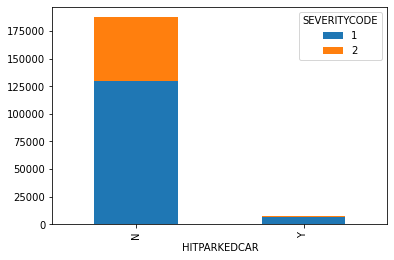

In [249]:
df = accidentData.groupby(['HITPARKEDCAR', 'SEVERITYCODE'])['SEVERITYCODE'].count().unstack('SEVERITYCODE')
df.plot(kind="bar",stacked=True)

#### Above attribute, can be used in modeling. However needs more investigation

#### Let's describe the data and find missing values as well

In [250]:
accidentData.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDATE_1
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,63,62,NaN,NaN,2,12
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N,October
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,44421,44421,NaN,NaN,187457,17768
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,NaN


In [251]:
missing_data = accidentData.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDATE_1
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False


#### Count missing values in each column

In [252]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

#### Populate the missing data with Mean or Frequency

Following attributes needs to be populated with Frequency:
<ol>
    <li> X, Y </li>
    <li> COLLISIONTYPE </li>
    <li> WEATHER </li>
    <li> ROADCOND </li>
    <li> LIGHTCOND </li>
    <li> SPEEDING </li>
</ol>

Following attributes with null values will be removed:
<ol>
    <li> ADDRTYPE </li>
    <li> JUNCTIONTYPE </li>
</ol>
    
No action needed for Following attributes as we will consider in our modeling :
<ol>
    <li> INTKEY </li>
    <li> LOCATION </li>
    <li> EXCEPTRSNCODE </li>
    <li> EXCEPTRSNDESC </li>
    <li> INATTENTIONIND </li>
    <li> UNDERINFL </li>
    <li> PEDROWNOTGRNT </li>
    <li> SDOTCOLNUM </li>
    <li>ST_COLCODE </li>
    <li>ST_COLDESC </li>
</ol>

#### Replace missing data with Frequency

In [253]:
valuetoReplace = accidentData['X'].value_counts().idxmax()
valuetoReplace

-122.3326533

In [254]:
accidentData['X'].replace(np.nan, valuetoReplace, inplace=True)

In [255]:
valuetoReplace = accidentData['Y'].value_counts().idxmax()
valuetoReplace

47.7086545

In [256]:
accidentData['Y'].replace(np.nan, valuetoReplace, inplace=True)

In [257]:
valuetoReplace = accidentData['COLLISIONTYPE'].value_counts().idxmax()
accidentData['COLLISIONTYPE'].replace(np.nan, valuetoReplace, inplace=True)

In [258]:
valuetoReplace = accidentData['WEATHER'].value_counts().idxmax()
accidentData['WEATHER'].replace(np.nan, valuetoReplace, inplace=True)

In [259]:
valuetoReplace = accidentData['ROADCOND'].value_counts().idxmax()
accidentData['ROADCOND'].replace(np.nan, valuetoReplace, inplace=True)
valuetoReplace = accidentData['LIGHTCOND'].value_counts().idxmax()
accidentData['LIGHTCOND'].replace(np.nan, valuetoReplace, inplace=True)
valuetoReplace = accidentData['SPEEDING'].value_counts().idxmax()


#### Drop rows which have null value for ADDRTYPE

In [260]:

accidentData.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
accidentData.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)



accidentData.reset_index(drop=True, inplace=True)

#### Create a new Dataframe with relevent columns

In [261]:
new_accidentData = accidentData[['ADDRTYPE', 'COLLISIONTYPE','PERSONCOUNT', 'VEHCOUNT', 'WEATHER', 'JUNCTIONTYPE', \
                                              'ROADCOND', 'LIGHTCOND']]

In [262]:
pd.set_option('display.max_columns', None)
new_accidentData.head(3)

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,WEATHER,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,Intersection,Angles,2,2,Overcast,At Intersection (intersection related),Wet,Daylight
1,Block,Sideswipe,2,2,Raining,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,Block,Parked Car,4,3,Overcast,Mid-Block (not related to intersection),Dry,Daylight


In [263]:
missing_data1 = new_accidentData.isnull()
missing_data1.head(5)
for column in missing_data1.columns.values.tolist():
    print(column)
    print (missing_data1[column].value_counts())
    print("")    

ADDRTYPE
False    188014
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    188014
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    188014
Name: PERSONCOUNT, dtype: int64

VEHCOUNT
False    188014
Name: VEHCOUNT, dtype: int64

WEATHER
False    188014
Name: WEATHER, dtype: int64

JUNCTIONTYPE
False    188014
Name: JUNCTIONTYPE, dtype: int64

ROADCOND
False    188014
Name: ROADCOND, dtype: int64

LIGHTCOND
False    188014
Name: LIGHTCOND, dtype: int64



In [264]:
new_accidentData.shape

(188014, 8)

#### Above data is now clean. Now we will assign numerical value

In [265]:
new_accidentData.dtypes

ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
VEHCOUNT          int64
WEATHER          object
JUNCTIONTYPE     object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [266]:
new_accidentData['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)

new_accidentData['COLLISIONTYPE'].replace(to_replace=['Parked Car','Angles','Rear Ended', 'Other', 'Sideswipe', 'Left Turn', \
                                                     'Pedestrian', 'Cycles', 'Right Turn', 'Head On'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)

new_accidentData['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights', \
                                                  'Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

new_accidentData['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain', \
                                                'Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

new_accidentData['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt',\
                                                 'Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

new_accidentData['JUNCTIONTYPE'].replace(to_replace =['Mid-Block (not related to intersection)' ,'At Intersection (intersection related)',\
                                                      'Mid-Block (but intersection related)','Driveway Junction' , \
                                                      'At Intersection (but not related to intersection)', 'Ramp Junction' ,\
                                                      'Unknown'],value=[0,1,2,3,4,5,6],inplace=True) 

new_accidentData.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,WEATHER,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,1,1,2,2,2,1,1,0
1,0,4,2,2,1,0,1,1
2,0,0,4,3,2,0,0,0
3,0,3,3,3,0,0,0,0
4,1,1,2,2,1,1,1,0


#### Now Let's get X & Y values

In [268]:
X = new_accidentData.values
X[0:3]
len(X)

188014

In [271]:
Y = accidentData['SEVERITYCODE']
Y[0:3]
len(Y)

188014

#### Data Normalization

In [272]:
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [274]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:3]

array([[ 1.36184222, -0.59958828, -0.3386394 ,  0.1218021 ,  1.20271738,
         0.21573639,  0.79167612, -0.56957815],
       [-0.7262618 ,  0.79340202, -0.3386394 ,  0.1218021 ,  0.26751702,
        -0.83978204,  0.79167612,  0.39036759],
       [-0.7262618 , -1.06391837,  1.13048581,  1.69485474,  1.20271738,
        -0.83978204, -0.58093725, -0.56957815]])

#### Split & Train data

In [275]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

kNN = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)
kNN

Train set: (150411, 8) (150411,)
Test set: (37603, 8) (37603,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

#### Predict & Check accuracy

In [276]:
yhat = kNN.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 1])

In [278]:
from sklearn import metrics
print("Train Accuracy: ", metrics.accuracy_score(Y_train, kNN.predict(X_train)))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train Accuracy:  0.72389652352554
Test Accuracy:  0.7018057069914635


In [279]:
Ks=15
mean_acc=np.zeros((Ks-1)) #gives an array filled with zeroes
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,Y_train)
    yhat = kNN.predict(X_test)
    
    print('yhat=', yhat)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])
mean_acc

yhat= [2 1 1 ... 1 2 2]  Y_test= 83662     1
1207      1
136901    1
101419    1
121655    1
         ..
143468    1
38848     1
183184    1
179979    2
145388    2
Name: SEVERITYCODE, Length: 37603, dtype: int64
yhat= [2 1 1 ... 1 2 2]  Y_test= 83662     1
1207      1
136901    1
101419    1
121655    1
         ..
143468    1
38848     1
183184    1
179979    2
145388    2
Name: SEVERITYCODE, Length: 37603, dtype: int64
yhat= [2 1 1 ... 1 2 2]  Y_test= 83662     1
1207      1
136901    1
101419    1
121655    1
         ..
143468    1
38848     1
183184    1
179979    2
145388    2
Name: SEVERITYCODE, Length: 37603, dtype: int64
yhat= [2 1 1 ... 1 2 2]  Y_test= 83662     1
1207      1
136901    1
101419    1
121655    1
         ..
143468    1
38848     1
183184    1
179979    2
145388    2
Name: SEVERITYCODE, Length: 37603, dtype: int64
yhat= [2 1 1 ... 1 2 2]  Y_test= 83662     1
1207      1
136901    1
101419    1
121655    1
         ..
143468    1
38848     1
183184    1
179979 

array([0.70180571, 0.70180571, 0.70180571, 0.70180571, 0.70180571,
       0.70180571, 0.70180571, 0.70180571, 0.70180571, 0.70180571,
       0.70180571, 0.70180571, 0.70180571, 0.70180571])

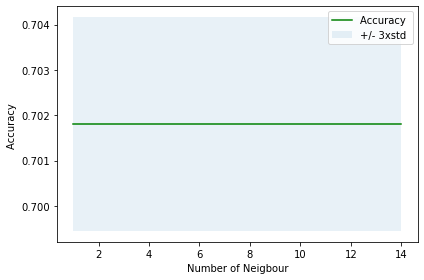

In [280]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neigbour')
plt.tight_layout()
plt.show()

#### Best K value and F1 score

In [281]:
print( "Best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1)

from sklearn.metrics import f1_score
print("KNN F1-score: %.2f" % f1_score(Y_test, yhat, average='weighted') )


Best accuracy was  0.7018057069914635 with k= 1
KNN F1-score: 0.70
